# Narrative Analytics and Experimentation

In This Capstone I will try and hypothises regarding a subject to try and show how Narrative analytics and experimentation is conducted by a data scientest. I will provide the dataset to mock the experemint's data, however, I will write a guidline on how to conduct the experiment.



## The Expirement:

There are many video-games out there in the market, some are serious while others are silly. Lately, there seems to be a surge in shooter games' popularity. In this experiment, I will test the validity of this cliam by conducting an A/B test between shooter games and puzzle games. The metrics I will use is the average global sales in $. 

So The hypothesis is Shooter games are more popular than puzzle games.


## The Research Proposal:

The study will require collecting all games identified by their genre, the console they run on, the year it was released, and the game's sales.

Of course the data actually comes from Kaggle ready for exploration and statistical anlysis.
Before rolling out, the data should be representative of the global market, assuming that sales differ from region to region. However I could use a certain region to test for if that was the requirment. 
Our success metric here is the amount in $ of sales, with the higher sales as an indication of the popularity of the game. If the shooter games are significantly different than the total mean of all other games then shooter games would be the most popular.

An extra question would be: Where are shooter games more popular amongst the regions.


## The Data

The following Data is provided by Kaggle, and the API can be downloaded using :
(kaggle datasets download -d gregorut/videogamesales)

The Data has 11 columns and 16597 rows or entries of games. 
The games data is broken down by platform, Publisher, Year of Publication, and Sales seperated by Global sales, North American sales, European sales and Japanese sales

The following figures show the top publishers and platforms irrespective of the genre of the games.

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats



In [70]:
with open('vgsales.csv','r') as file:
    df = pd.read_csv(file)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


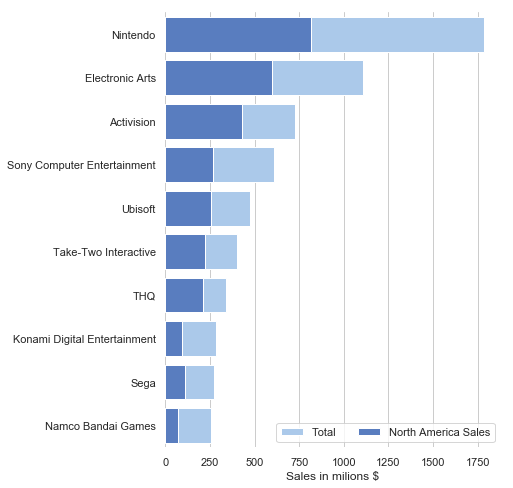

In [37]:
rankedPublish = pd.DataFrame(df.groupby('Publisher')[['Global_Sales', 'EU_Sales','NA_Sales', 'JP_Sales']].sum().sort_values(ascending= False, by = ['Global_Sales', 'EU_Sales','NA_Sales', 'JP_Sales'] ).head(10))
rankedPublish.reset_index(inplace=True)
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Global_Sales",
            y="Publisher", 
            data=rankedPublish,
            label="Total",
            color="b")

sns.set_color_codes("muted")
sns.barplot(x='NA_Sales',
            y= "Publisher",
            data= rankedPublish,
            label="North America Sales",
            color="b")
# Load the example car crash dataset

# Plot the total crashes
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",
       xlabel="Sales in milions $")
sns.despine(left=True, bottom=True)
plt.show()

In [38]:
rankedPublish.head()

,Publisher,Global_Sales,EU_Sales,NA_Sales,JP_Sales
0,Nintendo,1786.56,418.74,816.87,455.42
1,Electronic Arts,1110.32,371.27,595.07,14.04
2,Activision,727.46,215.53,429.70,6.54
3,Sony Computer Entertainment,607.50,187.72,265.22,74.10
4,Ubisoft,474.72,163.32,253.43,7.50


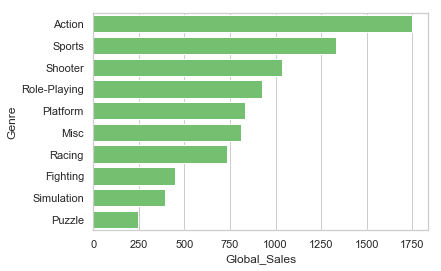

In [96]:
rankedPlat = pd.DataFrame(pd.DataFrame(df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending= False).head(10)))
rankedPlat.reset_index(inplace=True)

sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x="Global_Sales", y="Genre", data=rankedPlat,
            label="Total", color="g")
plt.show()

As the figures show, the top publisher is Nintendo and the top platform of all times is the PS2. 



Now lets look at our shooter games, how their sales changed over time.

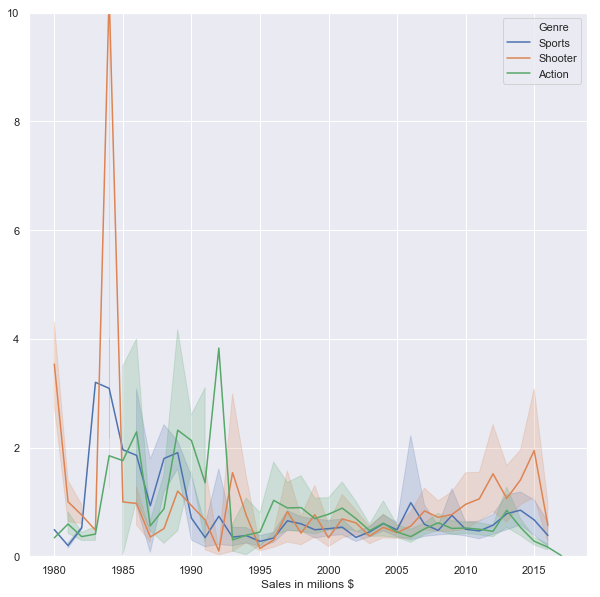

In [80]:
shooterTime = df[(df.Genre == 'Shooter') | (df.Genre == 'Sports') | (df.Genre == 'Action') ]
ax2 = plt.subplots(figsize=(10, 10))
sns.set(style="darkgrid")


# Plot the responses for different events and regions
ax2= sns.lineplot(x="Year", y="Global_Sales",
             hue = 'Genre', 
                 data=shooterTime)

ax2.set(ylim = (0,10),  ylabel="",
       xlabel="Sales in milions $")
plt.show()


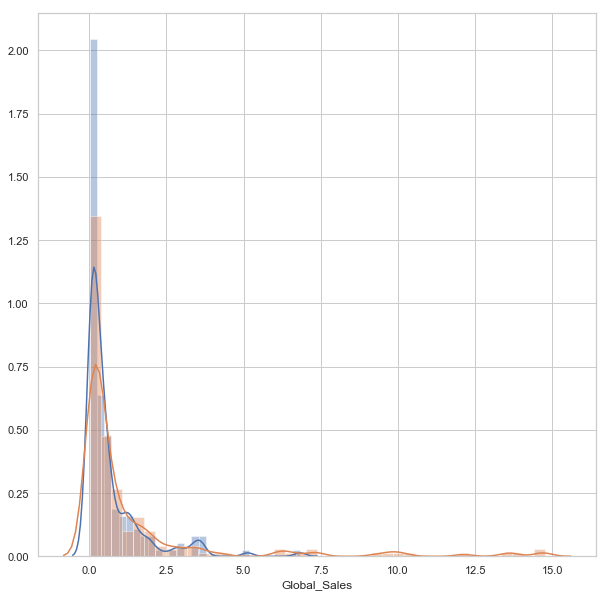

In [103]:
p4 = plt.subplots(figsize=(10, 10))
p4= sns.distplot(df[(df.Genre == 'Shooter') & (df.Platform == 'PS2')].Global_Sales)

sns.distplot(df[(df.Genre == 'Shooter') & (df.Platform == 'X360')].Global_Sales)

plt.show()

From the figure above, we can see how shooter games have been the top grossing genre over time. We will see if there was a major difference between the shooter genre and other genres by taking the T-test to compare the mean of the shooter games compared to that of other genres. we will set alpha to 0.05 and check our hypothesis. 


Ttest_indResult(statistic=-3.0953856140142437, pvalue=0.0021190952594376043)

In [106]:
print('PS2 sales rate:', df[(df.Genre == 'Shooter') & (df.Platform == 'PS2')].Global_Sales.mean())
print('Xbox 360 sales rate:', df[(df.Genre == 'Shooter') & (df.Platform == 'X360')].Global_Sales.mean())


PS2 sales rate: 0.6785624999999998
Xbox 360 sales rate: 1.372167487684728


In [107]:
stats.ttest_ind(df[(df.Genre == 'Shooter') & (df.Platform == 'PS2')].Global_Sales,
                df[(df.Genre == 'Shooter') & (df.Platform == 'X360')].Global_Sales)

Ttest_indResult(statistic=-3.0953856140142437, pvalue=0.0021190952594376043)

From the test above we can see that there is a significance difference between the rate of sales of ps2 shooter games and shooter games on X360, which means that X360 is the more favourite console for shooter games. perhaps because of the controller. 